In [1]:
import pandas, matplotlib.pyplot as plt, numpy, string


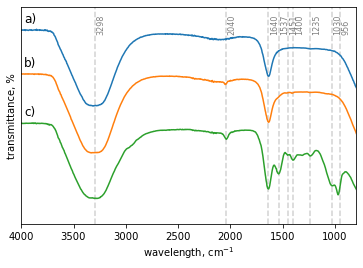

In [2]:
# labelling spectra
letter_labels = dict(zip(range(0,26),string.ascii_lowercase))

def col_to_array(col):
    return numpy.array(col.values).astype(numpy.float)

def data_plot(i,csv,name):
    """
    Returns experimental FTIR spectra data from csv.
    
    Parameters:
    i (int):          plot index; used to vertically place the spectra
    csv (.csv file):  raw data; wavenumber in the first column and transmittance in the second.
    name (str):       string for spectrum legend
    
    """
    df = pandas.read_csv(csv, names=['wavenumber','transmittance','NaN'])
    df = df.drop([0,1], axis=0)
    wavenumber = col_to_array(df.wavenumber)
    transmittance = col_to_array(df.transmittance)
    vertical_space_factor = 30
    vertical_space_shifter = 5
    plt.plot(wavenumber, 
             transmittance - vertical_space_factor*i,
             label=name)
    plt.text(wavenumber[0] - vertical_space_factor, 
             transmittance[0] + vertical_space_shifter - vertical_space_factor*i, 
             letter_labels[i] + ')', 
             fontsize=12)

# List of lists with raw data and assosciated legend names:
plots = [ 
         ['data/Bacteria_2.csv','living bacteria'],
#          ['data/Bacteria.csv', 'living bacteria OG'],
         ['data/Bacteria_NaN3.csv','bacteria after NaN$_3$ addition'],
#          ['data/Bacteria_Pb_2.csv','bacteria and Pb repeat'],
#          ['data/Bacteria_Fresh.csv','fresh bacteria'],
         ['data/Bacteria_NaN3_Pb.csv','bacteria after NaN$_3$ and Pb(NO$_3$)$_2$ addition']
        ]

fig = plt.figure('One')
axes = plt.axes()

# FTIR peaks of significance:
peaks = [2040, 3298, 1640,1537,956, 1400, 1030, 1235, 1451]

# Labelling peaks:
for peak in peaks:
    plt.vlines(peak, -25, 111, linestyles='dashed',color='lightgray')
    plt.text(peak - 15, 95, str(peak), rotation='vertical', color='gray',fontsize=8)
    
# Multiple iterations of data_plot function:
for i in range(len(plots)):
    data_plot(i,plots[i][0],plots[i][1])

axes.set_xlim(4000,800)
axes.set_xlabel('wavelength, cm$^{-1}$')
axes.set_ylabel('transmittance, %')
axes.set_ylim(-25,111)
plt.yticks([])
fig.savefig('ftir2.png',dpi=600, bbox_inches='tight')
plt.show()